[MyEdge with nodes (4.34,1.81) (4.44,1.72), MyEdge with nodes (2.55,2.29) (2.80,2.14), MyEdge with nodes (3.70,1.55) (3.51,1.28), MyEdge with nodes (3.77,3.02) (3.82,3.15), MyEdge with nodes (2.80,3.01) (3.05,3.12)]
myG.road_edges 190
2


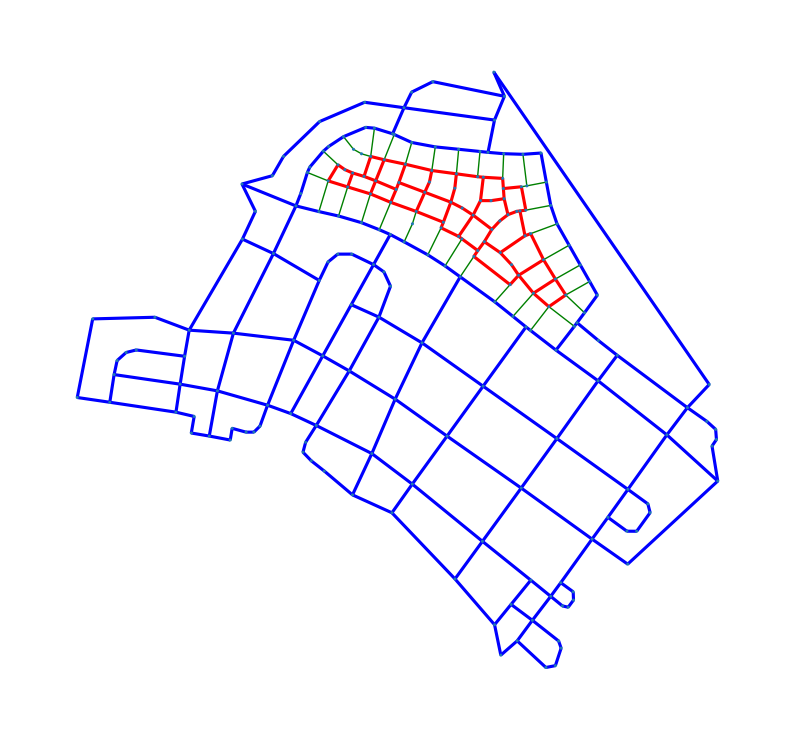

In [3]:
######################################################################
############################## Add Path ##############################
######################################################################
import sys
import os
cwd = os.getcwd()
sys.path.append(cwd) 
parent_dir = os.path.dirname(cwd)
sys.path.append(parent_dir) 

import json
import numpy as np
import pretreatment.my_graph as mg
import pretreatment.my_graph_helpers as mgh
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.collections import LineCollection
import networkx as nx
import itertools
import operator

import copy
import inspect
import time

import pickle

import DebugAndPreview as DP


######################################################################
############################## Add Path ##############################
######################################################################
cwd = os.getcwd()
sys.path.append(cwd) 
parent_dir = os.path.dirname(cwd)
sys.path.append(parent_dir) 

#######################################################################
###############   Input the name of site   ############################
#######################################################################
siteName = "punggol_1"

#######################################################################
############################## Load File ##############################
#######################################################################
jsonName = siteName + ".json"                             
jsonPath = parent_dir + "/JSONInput/" + jsonName
myG,myNodeDict,myEdgeDict = mgh.GraphFromJSON_Customized(jsonPath,scaleTag=True,new_min = 0,new_max = 5)   #  min and max is the range of the scale


#######################################################################
####################### Build the graph ###############################
#######################################################################

###### Initialize info ######
initialCandidateRoadEdges = len(myG.myedges()) - len(myG.road_edges)
# print ("initial candidate road edges", initialCandidateRoadEdges)

myG.define_roads_FirstTime()                 # Road
myG.define_interior_parcels()                # Interior_Parcels

###### Preview the graph ######
# myG.plot_roads(parcel_labels=True)
# plt.plot()

remainCandidateRoadEdges = len(myG.myedges()) - len(myG.road_edges)
# print ("remain candidate road edges", remainCandidateRoadEdges)

print (myG.POIEdges)
######  Feature and property ######
myG.feature_init()
myG.td_dict_POI_Related_init()

#######################################################################
####### Save this original state to mg before the road building #######
#######################################################################
save_dir = parent_dir + "/data"
DP.SaveGraph_mg(myG,save_dir,siteName)


# #######################################################################
# ########################### Road building  ############################
# #######################################################################
# new_roads_i = mgh.build_all_roads(myG,
#                                 myG, # ??
#                                 alpha=2,
#                                 wholepath=True,
#                                 barriers=False,
#                                 road_max=1,
#                                 plot_intermediate=False,
#                                 strict_greedy=True,
#                                 vquiet=False,
#                                 outsidein=True
#                                 )

##### Preview the graph ######
myG.plot_roads(parcel_labels=True)

# ###### Feature recalculate ######
# myG.td_dict_POI_Related_init()
# remainCandidateRoadEdges = len(myG.myedges()) - len(myG.road_edges)
# # print ("remain candidate road edges", remainCandidateRoadEdges)

In [1]:
#######################################################################
########################### Road A File ###############################
#######################################################################
file_path = '/Users/chenzebin/Documents/GitHub/road-planning-for-slums/JSONInput/tempFile.mg'
# Read the data
with open(file_path, 'rb') as mgfile:
    myG = pickle.load(mgfile)

In [16]:
####################################
#######   Get Road balances   ######
####################################
total_road_steps = len(myG.myedges()) - len(myG.road_edges)    # Check the current road configuration!
build_ration = 0.5
allowed_road_steps  = build_ration * total_road_steps - len(myG.road_edges)
print ("allowed_road_steps",allowed_road_steps)


####################################
######   Check current values ######
####################################
print (myG.face2POI_avg())
print (myG.f2POI_avg)
print (myG.f2POI_avg_min)




allowed_road_steps -164.5
1.4216780249781595
1.4216780249781595
1.0529360924060305



In [2]:
############### This is to visualze the “parcel to parcel distance”（F2F） improvement after adding new roads  ############### 

####################################
############    F2F     ############
####################################
# PlotF2FDist(S0,vmin = 0,vmax = 5000)
# optNum = 5
# for i in range(optNum):  
#     bisecting_roads = mgh.bisecting_road(S0)
#     S0.plot_roads(parcel_labels=True)
#     S0.PlotF2FDist(vmin = 0,vmax = 5000)



209
td_init
212


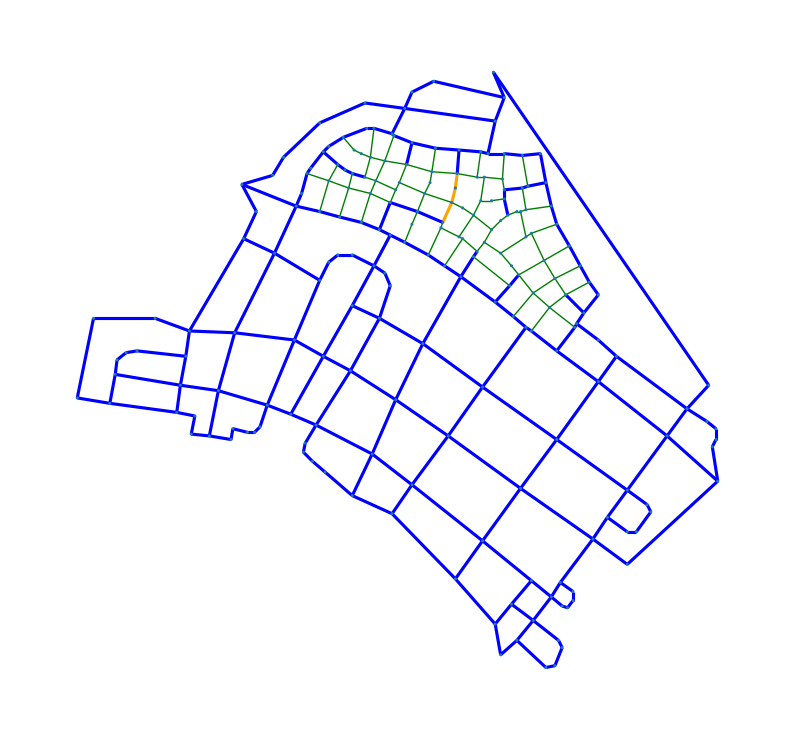

td_init
216


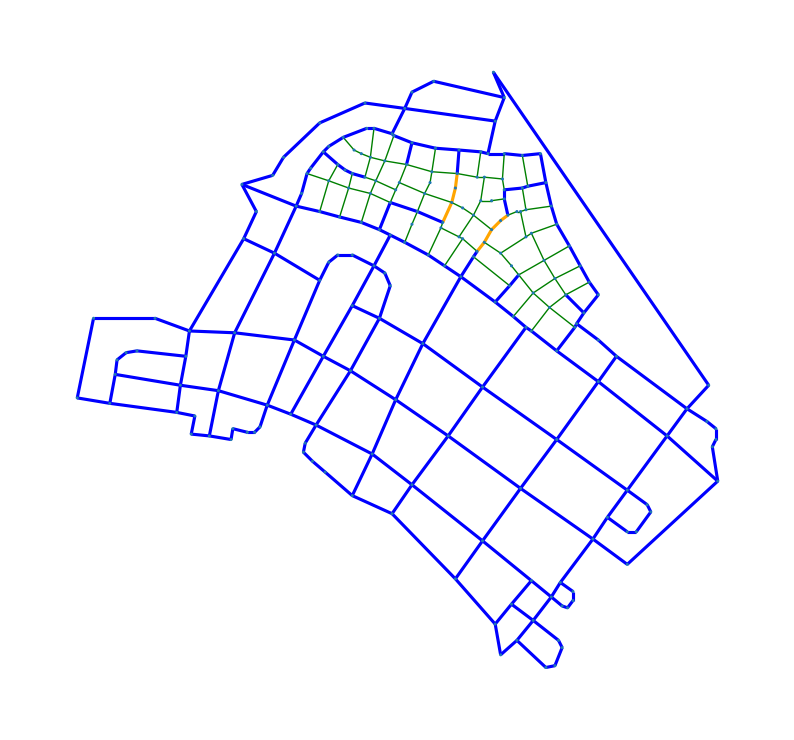

td_init
230


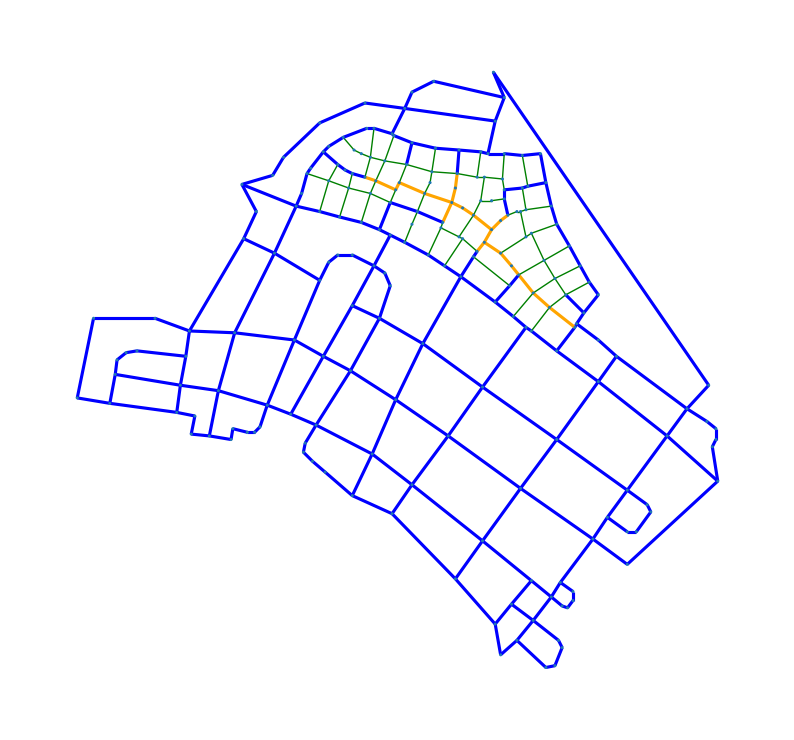

td_init
232


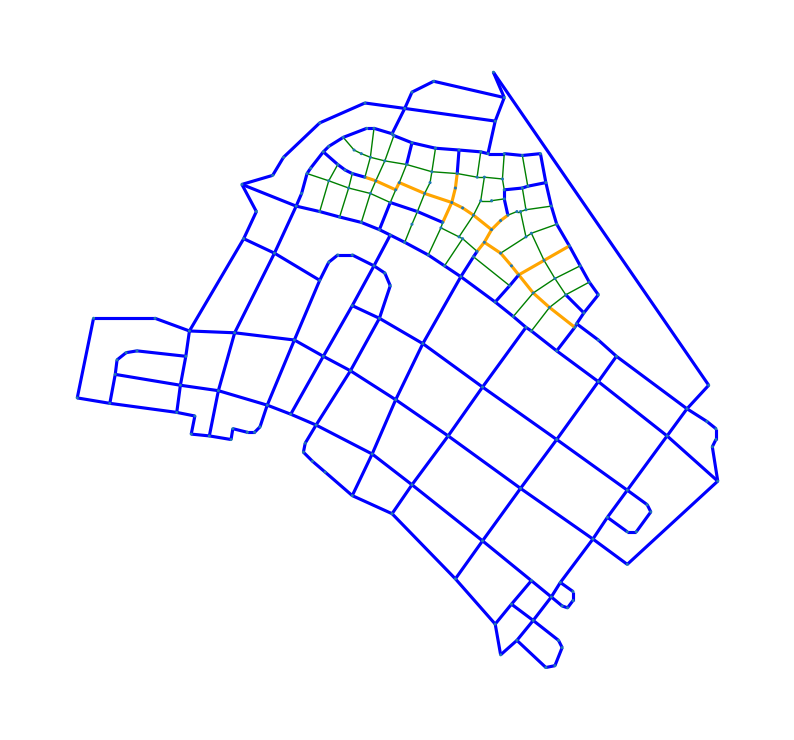

td_init
234


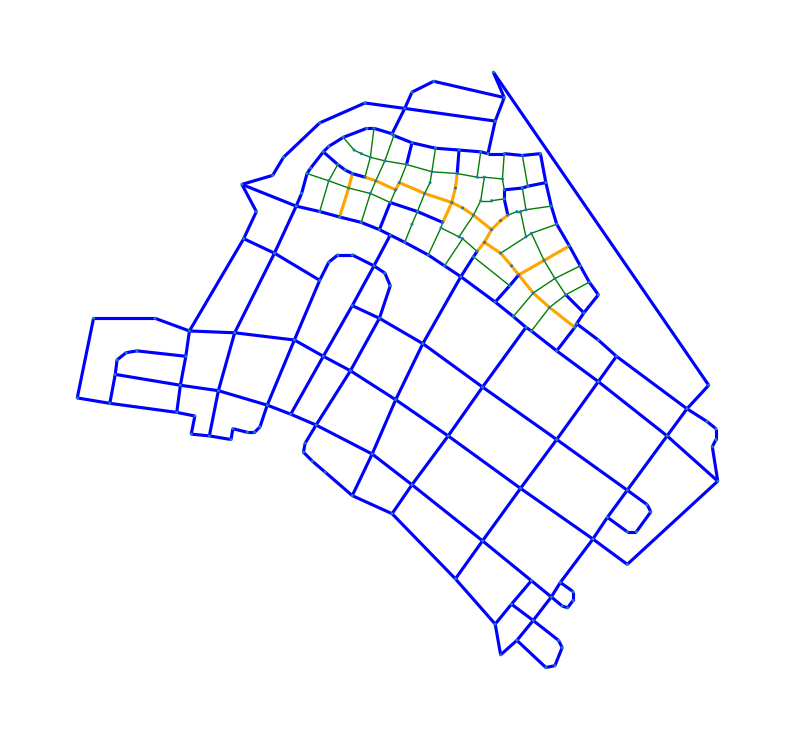

td_init
236


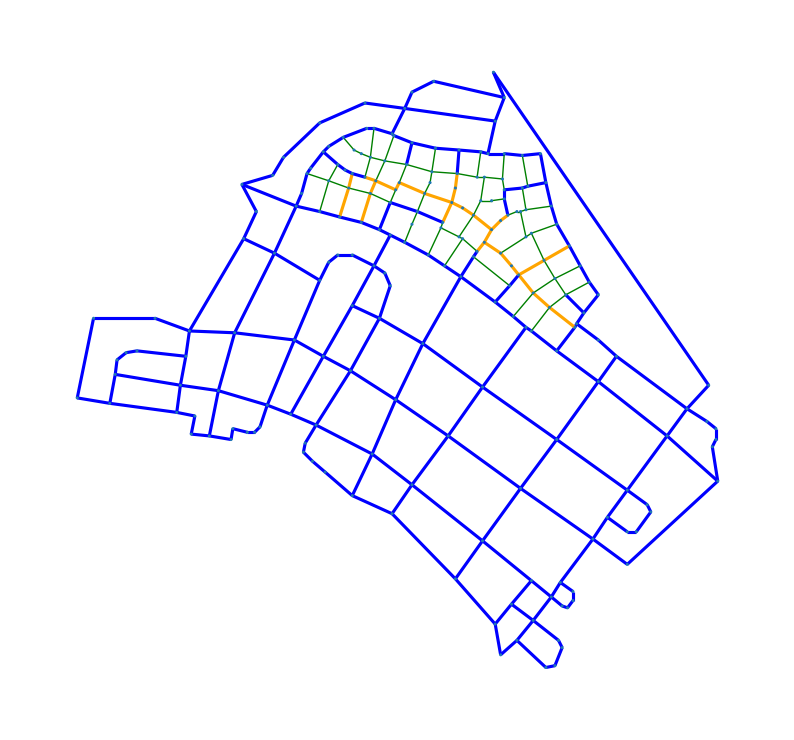

In [18]:
############### This is to visualze the “parcel to POI distance”（F2POI）improvment after adding new roads  ############### 
############### Provide 2 kinds of loop: 1. Loop by iteration 2. Loop by road ration  ###############

##############################
###### F2POI: POI       ######
##############################
S0 = copy.deepcopy(myG)

################ Loop by iteration ################

# optNum = 1
# time1 = time.time()
# S0.td_dict_POI_Related_init() 
# #S0.PlotF2POIDist()
# time1 = time.time()
# for i in range(optNum): 
#     mgh.bisecting_road_forPOI(S0)
#     S0.td_dict_POI_Related_init() 
#     print (len(S0.road_edges))
#     #S0.plot_roads(parcel_labels=True)
#     #S0.PlotF2POIDist()
# time2= time.time()

# print ("comsumption",time2-time1)
# time1 = time.time()
# S0.td_dict_init()
# time2 = time.time()
# print ("comsumption",time2-time1)

################  Loop by road ration ################

i= 0
while i < 6:
    S0.td_dict_POI_Related_init() 
    mgh.bisecting_road_forPOI(S0)
    print (len(S0.road_edges))
    S0.plot_roads(parcel_labels=True)
    #S0.PlotF2POIDist()

    plt.show()
    i+=1